## Regresi Linear

    Merupakan anaisi untuk mempelajari dan mengukur hubungan yang terjadi antra 2 variable

    Contoh :
    variable 1 = tingkat pendidikan
    variable 2 = penghasilan
    
    apakah semakin tinggi tingkat pendidikan seseorang maka penghasilannya juga akan semakin tinggi ?
    
    contoh lainnya
    variable 1 = biaya promosi
    variable 2 = penjualan
    
    apakah dengan semakin meningkatkan biaya promosi nilai penjualan dalam suatu perusahaan akan semakin meningkat?
     

## Memperdiksi harga(y) dari sebuah mobil berdasarkan jumlah horsepower(x) dari mobil tersebut

    Tahapan dalam penggunaan Simple Regresi Linear adalah sbb:

## 1. Memanggil Library yang dibutuhkan

In [103]:
import numpy as np # untuk scientific calculation
import pandas as pd # untuk manipulasi data like membuat table, mengubah dimensi data dsb
import matplotlib.pyplot as plt # mebuat grafik plot
from sklearn.linear_model import LinearRegression # memanggil method2 yang sudah disediakan machine learning
from sklearn.model_selection import train_test_split

## 2. Memanggil Dataset

In [104]:
df = pd.read_csv('data.csv', usecols=['horsepower', 'price'])
df.head() # melihat 5 baris teratas #  Independent variable(x) atau variable bebas adalah horse power
#Dependent variable atau variable output(y) adalah price


,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [105]:
df.shape # Mengetahui jumlah baris dan kolom dari df

(200, 2)

In [106]:
df.describe() 

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [107]:
df.isnull().sum()

horsepower    0
price         0
dtype: int64

In [108]:
df['horsepower'].ndim # pengecekan tipe dimensi

1

In [109]:
df['horsepower'].shape # pengecekan row X column

(200,)

## 3. Menampilkan grafik data asli

Text(0.5, 1.0, 'Scatter Plot Horsepower vs Price')

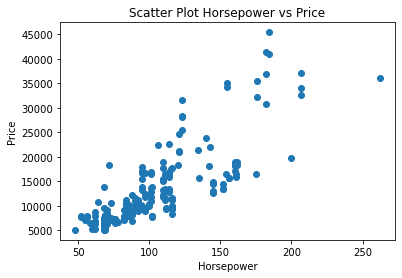

In [110]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')


* Dari scatter plot dapat dilihat secara kasat mata bahwa data memilik korelasi positif yang cukup signifikan
* Hal ini berarti dengan bertambahnya nilai dari horsepower makan nilai price pun semakin tinggi

In [111]:
df.corr() # mengetahui nilai korelasi dari horse power dan Price. Nilai korelasi adalah 0.81 termasuk kategori tinggi

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


## 4. Modeling

gunanya untuk menemukan pola - pola di dalam data yang hendak dijadikan dasar pengetahuan sistem yang dibangun

In [112]:
# Pertama , buat variabel x dan y
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1, 1)

In [113]:
y.shape 

(200, 1)

In [114]:
# kedua kita split data menjadi training dan testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [115]:
#ketiga kita bikin objet linear regresi
lin_reg = LinearRegression()

In [116]:
#Keempat, training the models menggunakan training data yang sudah di split sebelumnya
lin_reg.fit(x_train, y_train)

LinearRegression()

In [117]:
#Kelima, cari tahu accuracy dari score dari model kita menggunakan testing data yang sudah di split sebelumnya
lin_reg.score(x_test, y_test)

0.6897713357529813

Model kita mendapatkan score sebesar 69%

Text(0.5, 1.0, 'Plot Horsepower vs Price')

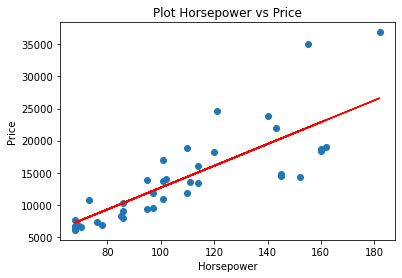

In [118]:
# keenam visualisasi Regresi Line menggunakan data testing
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

* Garis merah merupakan Regresion Line dari model yang telah dibuat
* Setelah kita yakin dengan model yang dibuat, selanjutnya adalah prdeiksi dari harga mobil dangan horsepower 100, 150 dan 200

In [119]:
# prediksi harga mobil dengan horsepower 100
lin_reg.predict([[100]])

array([[12679.48788245]])

In [120]:
# prediksi harga mobil dengan horsepower 150
lin_reg.predict([[150]])

array([[21175.49498481]])

In [121]:
# prediksi harga mobil dengan horsepower 200
lin_reg.predict([[200]])

array([[29671.50208717]])